<a href="https://colab.research.google.com/github/Luizaaaa/MachineLearning/blob/main/L12_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive

drive.mount('/content/drive')

db = pd.read_csv('/content/drive/My Drive/CSV/dados.csv')
db.head()

Mounted at /content/drive


,id,height,yellowCards,offside,assists,position
0,1,183,4,0.0,2,zagueiro
1,2,186,4,0.0,2,zagueiro
2,3,187,10,0.0,5,zagueiro
3,4,185,5,0.1,1,zagueiro
4,5,190,6,0.0,1,zagueiro


In [ ]:
d = {'zagueiro': 0,
     'atacante': 1,
     'meia': 2}
db = pd.read_csv('/content/drive/My Drive/CSV/dados.csv')     
db['position'] = db['position'].map(d)

db.head()


,id,height,yellowCards,offside,assists,position
0,1,183,4,0.0,2,0
1,2,186,4,0.0,2,0
2,3,187,10,0.0,5,0
3,4,185,5,0.1,1,0
4,5,190,6,0.0,1,0


In [ ]:
X = db.iloc[:,[2,4]].values
y = db['position'].values


print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=128, stratify=y)

In [ ]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


Labels counts in y: [10 10 10]
Labels counts in y_train: [7 7 7]
Labels counts in y_test: [3 3 3]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions


dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


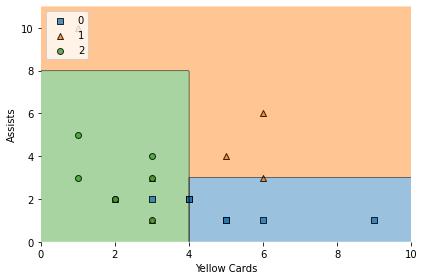

In [ ]:
plot_decision_regions(X_train, y_train, dt_model)

plt.xlabel('Yellow Cards')
plt.ylabel('Assists')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
y_test_pred = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.7777777777777778

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


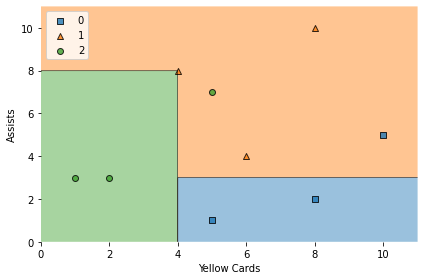

In [ ]:
plot_decision_regions(X_test, y_test, dt_model)

plt.xlabel('Yellow Cards')
plt.ylabel('Assists')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


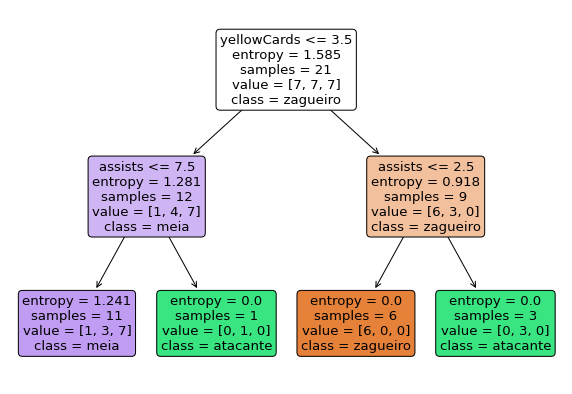

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))

plot_tree(dt_model, filled=True, rounded=True,
          class_names=['zagueiro', 
                       'atacante',
                       'meia'],
          feature_names=['yellowCards', 
                         'assists']) 

plt.show()

In [ ]:
print(np.shape(X_test))
print(np.shape(y_test))

X_test1 = X_test[1,:]
y_test1 = y_test[1]

print(np.shape(X_test1))
print(np.shape(y_test1))

X_test1 = np.reshape(X_test1,(1,-1))
y_test1 = np.reshape(y_test1,(1))

print(np.shape(X_test1))
print(np.shape(y_test1))


(9, 2)
(9,)
(2,)
()
(1, 2)
(1,)


In [ ]:
y_test1_pred  = dt_model.predict(X_test1)

y_test1_pred

array([1])

In [ ]:
accuracy_score(y_test1, y_test1_pred)

1.0

In [ ]:
X_test1


array([[6, 4]])